In [16]:
# Imports
import pandas as pd
import numpy as np
import datetime as dt
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
%matplotlib inline

In [17]:
# Bring in NBA Records CSV
team_stats_csv = Path('../1. Data_cleaning/Raw_Data/nba_team_stats.csv')
player_stats_csv = Path('../1. Data_cleaning/Cleansed_csv/height_salaries.csv')

# Read csv into a pandas Dataframe
team_stats = pd.read_csv(team_stats_csv)
player_stats = pd.read_csv(player_stats_csv)

# Organize dataframes for concatination
team_stats['Team'] = team_stats['Team'].replace(['LAC','LAL'],['LAL','LAC'])
team_stats.rename(columns={'Team':'Ticker'}, inplace=True)
team_stats.set_index('Ticker', inplace=True)
team_stats['Year'] = pd.DatetimeIndex(team_stats['Date']).year
team_stats.drop(columns=['Unnamed: 0', 'Game'], inplace=True)
team_stats['Margin'] = team_stats['TeamPoints'] - team_stats['OpponentPoints'] 
team_stats.head()

,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,...,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls,Year,Margin
Ticker,,,,,,,,,,,,,,,,,,,,,
ATL,10/29/2014,Away,TOR,L,102,109,40,80,0.500,13,...,0.818,16,48,26,13,9,9,22,2014,-7
ATL,11/1/2014,Home,IND,W,102,92,35,69,0.507,7,...,0.857,11,44,25,5,5,18,26,2014,10
ATL,11/5/2014,Away,SAS,L,92,94,38,92,0.413,8,...,0.711,11,50,25,7,9,19,15,2014,-2
ATL,11/7/2014,Away,CHO,L,119,122,43,93,0.462,13,...,0.741,11,51,31,6,7,19,30,2014,-3
ATL,11/8/2014,Home,NYK,W,103,96,33,81,0.407,9,...,0.727,13,44,26,2,6,15,29,2014,7


In [18]:
# Organize dataframes for concatination
names = ['Atlanta Hawks', 'Boston Celtics', 'Brooklyn Nets', 'Charlotte Bobcats',
 'Chicago Bulls', 'Cleveland Cavaliers', 'Dallas Mavericks', 'Denver Nuggets',
 'Detroit Pistons', 'Golden State Warriors', 'Houston Rockets',
 'Indiana Pacers', 'Los Angeles Clippers', 'Los Angeles Lakers',
 'Memphis Grizzlies', 'Miami Heat', 'Milwaukee Bucks',
 'Minnesota Timberwolves', 'New Orleans Hornets', 'New York Knicks',
 'Oklahoma City Thunder', 'Orlando Magic', 'Philadelphia 76ers',
 'Phoenix Suns', 'Portland Trail Blazers', 'Sacramento Kings',
 'San Antonio Spurs', 'Toronto Raptors', 'Utah Jazz', 'Washington Wizards']
tickers = ['ATL', 'BOS', 'BKN', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU',
 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOH', 'NYK', 'OKC', 'ORL', 'PHI',
 'PHX', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']
player_stats['Team'] = player_stats['Team'].replace(names,tickers)
player_stats.rename(columns={'Team':'Ticker'}, inplace=True)
player_stats.set_index('Ticker', inplace=True)
player_stats.head()

,Season Start,Season End,player_height,Salary,Salary w/ Inflation
Ticker,,,,,
ATL,2008,2009,2989.58,68168841.0,79797863.0
ATL,2009,2010,2829.56,65883642.0,78239128.0
ATL,2010,2011,2844.80,71469843.0,83988250.0
ATL,2011,2012,3025.14,73669912.0,83598545.0
ATL,2012,2013,3197.86,66710178.0,74461791.0


In [19]:
# Groupby for team data
team_stats_mean = team_stats.groupby(['Ticker','Year']).mean()
team_stats_std = team_stats.groupby(['Ticker','Year']).std()
team_stats_mean.head()

TeamPoints  OpponentPoints  FieldGoals  FieldGoalsAttempted  \
Ticker Year                                                                
ATL    2014  102.161290       97.419355   37.709677            80.612903   
       2015  102.470588       98.200000   38.200000            82.564706   
       2016  102.827160      100.691358   38.827160            85.259259   
       2017  103.941176      105.811765   38.188235            84.305882   
       2018  102.934783      109.456522   37.717391            86.195652   

             FieldGoals.  X3PointShots  X3PointShotsAttempted  X3PointShots.  \
Ticker Year                                                                    
ATL    2014     0.469806      9.290323              24.967742       0.372032   
       2015     0.463647      9.811765              26.741176       0.367247   
       2016     0.456148      9.765432              28.283951       0.345346   
       2017     0.453824      9.917647              27.141176       0.365188   
       2018     0.439348     11.369565              32.913043       0.348630   

             FreeThrows  FreeThrowsAttempted  ...  Opp.FreeThrowsAttempted  \
Ticker Year                                   ...                            
ATL    2014   17.451613            22.548387  ...                20.774194   
       2015   16.258824            20.647059  ...                20.152941   
       2016   15.407407            20.604938  ...                21.691358   
       2017   17.647059            23.552941  ...                20.447059   
       2018   16.130435            20.456522  ...                20.739130   

             Opp.FreeThrows.  Opp.OffRebounds  Opp.TotalRebounds  Opp.Assists  \
Ticker Year                                                                     
ATL    2014         0.734935        11.225806          43.096774    24.225806   
       2015         0.776471        11.494118          44.423529    22.800000   
       2016         0.755494        11.172840          45.592593    22.061728   
       2017         0.779282        10.964706          44.188235    24.694118   
       2018         0.784065         9.717391          44.673913    26.500000   

             Opp.Steals  Opp.Blocks  Opp.Turnovers  Opp.TotalFouls    Margin  
Ticker Year                                                                   
ATL    2014    7.354839    4.709677      14.967742       21.354839  4.741935  
       2015    7.800000    4.976471      15.835294       18.741176  4.270588  
       2016    9.000000    5.098765      15.061728       19.024691  2.135802  
       2017    8.470588    5.247059      15.023529       21.552941 -1.870588  
       2018    9.086957    5.739130      13.717391       19.826087 -6.521739  

[5 rows x 35 columns]

In [20]:
# Groupby for player data
player_stats_mean = player_stats.groupby(['Ticker','Season End']).mean()
player_stats_mean.head()

Season Start  player_height      Salary  \
Ticker Season End                                            
ATL    2009                2008        2989.58  68168841.0   
       2010                2009        2829.56  65883642.0   
       2011                2010        2844.80  71469843.0   
       2012                2011        3025.14  73669912.0   
       2013                2012        3197.86  66710178.0   

                   Salary w/ Inflation  
Ticker Season End                       
ATL    2009                 79797863.0  
       2010                 78239128.0  
       2011                 83988250.0  
       2012                 83598545.0  
       2013                 74461791.0

In [21]:
correl_df = pd.concat([team_stats_mean, player_stats_mean], axis='columns', join='inner')
correl_df.head()

TeamPoints  OpponentPoints  FieldGoals  FieldGoalsAttempted  \
ATL 2014  102.161290       97.419355   37.709677            80.612903   
    2015  102.470588       98.200000   38.200000            82.564706   
    2016  102.827160      100.691358   38.827160            85.259259   
    2017  103.941176      105.811765   38.188235            84.305882   
    2018  102.934783      109.456522   37.717391            86.195652   

          FieldGoals.  X3PointShots  X3PointShotsAttempted  X3PointShots.  \
ATL 2014     0.469806      9.290323              24.967742       0.372032   
    2015     0.463647      9.811765              26.741176       0.367247   
    2016     0.456148      9.765432              28.283951       0.345346   
    2017     0.453824      9.917647              27.141176       0.365188   
    2018     0.439348     11.369565              32.913043       0.348630   

          FreeThrows  FreeThrowsAttempted  ...  Opp.Assists  Opp.Steals  \
ATL 2014   17.451613            22.548387  ...    24.225806    7.354839   
    2015   16.258824            20.647059  ...    22.800000    7.800000   
    2016   15.407407            20.604938  ...    22.061728    9.000000   
    2017   17.647059            23.552941  ...    24.694118    8.470588   
    2018   16.130435            20.456522  ...    26.500000    9.086957   

          Opp.Blocks  Opp.Turnovers  Opp.TotalFouls    Margin  Season Start  \
ATL 2014    4.709677      14.967742       21.354839  4.741935          2013   
    2015    4.976471      15.835294       18.741176  4.270588          2014   
    2016    5.098765      15.061728       19.024691  2.135802          2015   
    2017    5.247059      15.023529       21.552941 -1.870588          2016   
    2018    5.739130      13.717391       19.826087 -6.521739          2017   

          player_height      Salary  Salary w/ Inflation  
ATL 2014        3208.02  58998677.0           64718790.0  
    2015        3009.90  58320278.0           62675759.0  
    2016        3020.06  71661760.0           76918414.0  
    2017        3609.34  96315163.0          102359377.0  
    2018        3794.76  99992696.0          104559718.0  

[5 rows x 39 columns]

<AxesSubplot:>

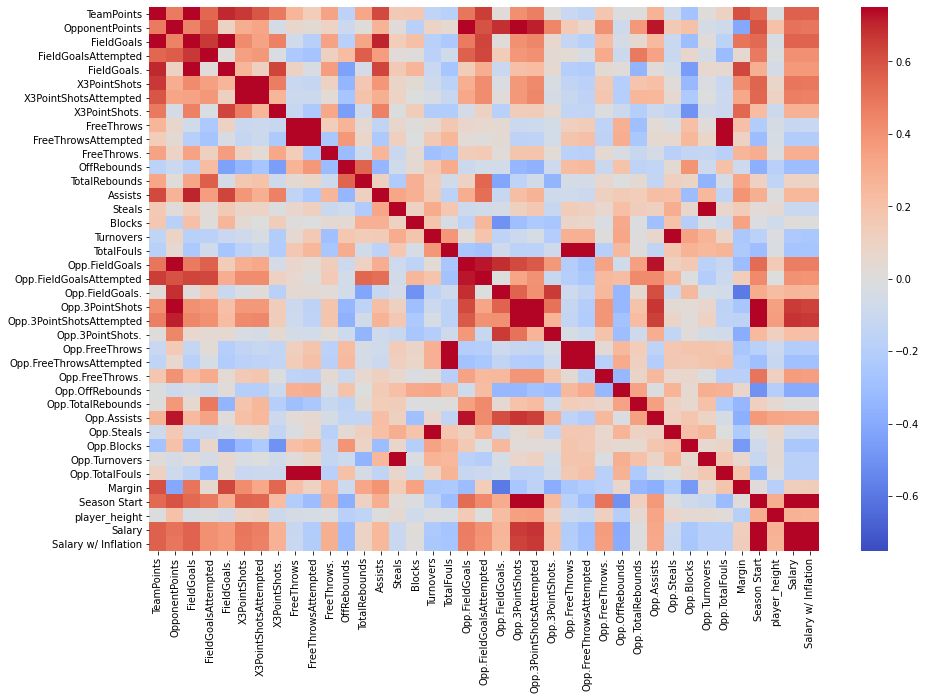

In [41]:
correl_heat_map = correl_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(
    correl_heat_map, 
    vmin=-.75, 
    vmax=.75, 
    cmap="coolwarm")

In [42]:
correl_scatter = correl_df.hvplot.scatter(
    title = 'Team salaries vs. height (and avg. winning margin)',
    x='player_height',
    xlabel='Team height (inches)',
    y='Salary w/ Inflation',
    yformatter= '%.0f',
    ylabel='Team salary ($, inflation adjusted)',
    s='TeamPoints',
    scale=2,
    color='Margin',
    cmap='coolwarm',
    clabel = 'Avg winning(/loosing) margin',
    alpha = 0.9,
    # groupby='Year', 
    height=500, 
    width=750)
correl_scatter

:Scatter   [player_height]   (Salary w/ Inflation,Margin,TeamPoints)

In [43]:
correl_scatter = correl_df.hvplot.scatter(
    title = 'Avg winning margin vs. salaries (and team height)',
    x='Salary w/ Inflation',
    xlabel='Team Salary ($, inf. adj.)',
    xformatter= '%.0f',
    y='Margin',
    yformatter= '%.0f',
    ylabel='Average winning(/loosing) margin (pts)',
    s='TeamPoints',
    scale=2,
    color='player_height',
    cmap='coolwarm',
    clabel = 'Agg. team height (in)',
    alpha = 0.9,
    # groupby='Year', 
    height=500, 
    width=600)
correl_scatter

:Scatter   [Salary w/ Inflation]   (Margin,player_height,TeamPoints)

In [44]:
# Calculate league average (margin should be zero)
league_mean = round(team_stats_mean.mean(),2)
league_mean.head()

TeamPoints             103.56
OpponentPoints         103.57
FieldGoals              38.60
FieldGoalsAttempted     84.85
FieldGoals.              0.46
dtype: float64

In [45]:
# Calculate sharpe ratios using mean and stdev winning margins accross seasons
team_sharpe = round ( ( team_stats_mean - league_mean ) / team_stats_std, 2 )
team_sharpe_group = team_sharpe.groupby(['Ticker']).mean()
team_sharpe_group.sort_values(by='Margin', ascending=False, inplace=True)
team_sharpe_group.head()

,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,FreeThrowsAttempted,...,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls,Margin
Ticker,,,,,,,,,,,,,,,,,,,,,
GSW,7.400000e-01,0.004,0.754,0.206,0.566,0.662,0.636,0.460,-0.092,-0.208,...,0.102,-0.046,0.306,0.034,-0.060,0.294,-0.490,0.170,-0.274,0.678
SAS,-1.387779e-18,-0.574,0.140,-0.124,0.156,-0.306,-0.686,0.168,-0.096,-0.206,...,-0.326,0.056,-0.228,-0.252,-0.318,-0.050,-0.336,0.040,-0.078,0.468
TOR,3.140000e-01,-0.178,0.104,-0.034,0.060,0.190,0.296,0.114,0.288,0.196,...,0.086,-0.050,0.004,-0.236,-0.100,-0.420,0.086,-0.016,0.136,0.468
HOU,4.280000e-01,-0.002,-0.122,-0.080,-0.156,1.102,1.706,0.052,0.328,0.418,...,-0.064,-0.004,0.080,-0.026,0.040,0.180,0.020,0.278,0.184,0.396
LAL,3.660000e-01,0.036,0.222,-0.196,0.282,0.234,0.232,0.180,0.214,0.346,...,0.190,-0.014,0.090,0.028,0.158,-0.156,-0.524,-0.014,0.402,0.274


In [46]:
# Concatinate with player stats over the period
player_sharpe_group = player_stats.groupby(['Ticker']).mean()
master_sharpe_df = pd.concat([team_sharpe_group, player_sharpe_group], axis='columns', join='inner')
master_sharpe_df.head()

,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,FreeThrowsAttempted,...,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls,Margin,Season Start,Season End,player_height,Salary,Salary w/ Inflation
Ticker,,,,,,,,,,,,,,,,,,,,,
GSW,7.400000e-01,0.004,0.754,0.206,0.566,0.662,0.636,0.460,-0.092,-0.208,...,0.294,-0.490,0.170,-0.274,0.678,2012.5,2013.5,3129.382,81177684.8,89601170.0
SAS,-1.387779e-18,-0.574,0.140,-0.124,0.156,-0.306,-0.686,0.168,-0.096,-0.206,...,-0.050,-0.336,0.040,-0.078,0.468,2012.5,2013.5,3297.970,80882305.1,89564778.3
TOR,3.140000e-01,-0.178,0.104,-0.034,0.060,0.190,0.296,0.114,0.288,0.196,...,-0.420,0.086,-0.016,0.136,0.468,2012.5,2013.5,3198.380,78003337.6,86278361.9
HOU,4.280000e-01,-0.002,-0.122,-0.080,-0.156,1.102,1.706,0.052,0.328,0.418,...,0.180,0.020,0.278,0.184,0.396,2012.5,2013.5,3152.970,75282128.3,83316698.6
LAL,3.660000e-01,0.036,0.222,-0.196,0.282,0.234,0.232,0.180,0.214,0.346,...,-0.156,-0.524,-0.014,0.402,0.274,2012.5,2013.5,3244.596,87502133.4,97433931.8


In [47]:
team_sharpe_bar = master_sharpe_df.hvplot.bar(
    title = 'Sharpe ratios (on winning margin per game)',
    x='Ticker', 
    y='Margin',
    ylabel='Sharpe Ratio',
    c='Salary w/ Inflation',
    colorbar=True,
    clabel= 'Team salary (infl. adj.)',
    cmap='coolwarm', 
    rot=90,
    height=500, 
    width=600)
team_sharpe_bar

:Bars   [Ticker]   (Margin,Salary w/ Inflation)

In [48]:
import panel as pn
tabs = pn.Tabs(,("Sharpe",team_sharpe_bar))
tabs

ValueError: cannot find widget or abbreviation for argument: 'data'